In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from collections import Counter

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import time

In [2]:
df = pd.read_pickle('Dataset.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13649 entries, 0 to 13663
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype          
---  ------                                     --------------  -----          
 0   SUB_STATUS                                 13649 non-null  string         
 1   UNIT_TEXT                                  13649 non-null  object         
 2   MEPP_y                                     13649 non-null  object         
 3   UNIT_VALUE_NEW                             13649 non-null  float64        
 4   target                                     13649 non-null  int64          
 5   target_v2                                  13649 non-null  int64          
 6   TEMPO_DURACAO                              13649 non-null  timedelta64[ns]
 7   TEMPO_RECURSO                              13649 non-null  timedelta64[ns]
 8   Fechamento_DIA                             13649 non-null  float64        
 9   PRODUC

In [4]:
df.drop(['VARIACAO_COTACAO_MINERIO_FERRO_MES'],axis=1, inplace=True)

In [5]:
from numpy import int64

df['TEMPO_DURACAO'] = df['TEMPO_DURACAO'].astype(int64)
df['TEMPO_RECURSO'] = df['TEMPO_RECURSO'].astype(int64)

Text(0.5, 1.0, 'Valores Faltantes')

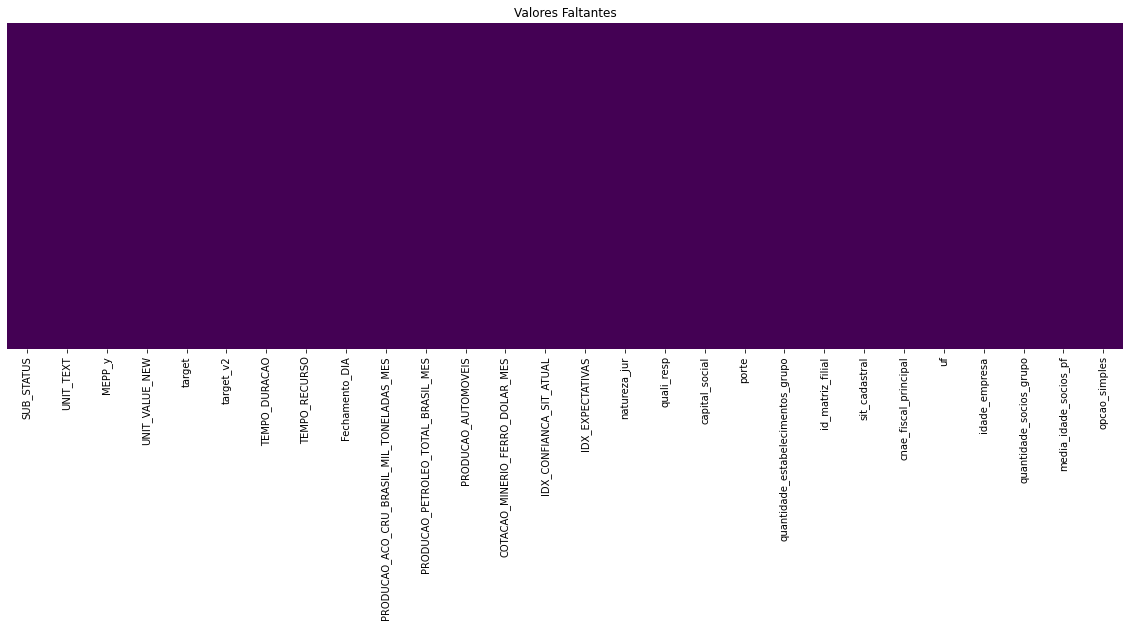

In [6]:
plt.figure(figsize=(20,6))
sns.heatmap(df.isna(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Valores Faltantes')

<AxesSubplot:>

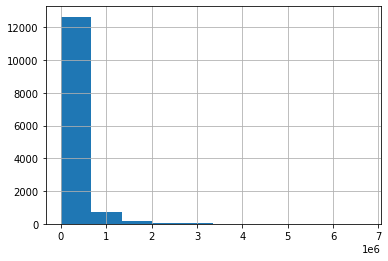

In [7]:
df['UNIT_VALUE_NEW'].hist()

<AxesSubplot:>

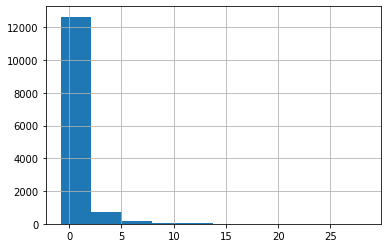

In [8]:
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
scaled_values = scaler.fit_transform(df[['UNIT_VALUE_NEW']])
df.drop(['UNIT_VALUE_NEW'], axis=1, inplace=True)
df['UNIT_VALUE_NEW_scaled'] = pd.Series(scaled_values.reshape(-1), index=df.index)
df['UNIT_VALUE_NEW_scaled'].hist()

In [9]:
lista_scaler = df.select_dtypes(['int64','float64']).columns.to_list()
lista_scaler

for idx,item in enumerate(lista_scaler):
    if not(item in ['target','target_v2','UNIT_VALUE_NEW_scaled']):
        # Create a RobustScaler object
        scaler = MinMaxScaler()
        scaled_values = scaler.fit_transform(df[[f'{item}']])
        df.drop([f'{item}'], axis=1, inplace=True)
        df[f'{item}_scaled'] = pd.Series(scaled_values.reshape(-1), index=df.index)         

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13649 entries, 0 to 13663
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SUB_STATUS                                        13649 non-null  string 
 1   UNIT_TEXT                                         13649 non-null  object 
 2   MEPP_y                                            13649 non-null  object 
 3   target                                            13649 non-null  int64  
 4   target_v2                                         13649 non-null  int64  
 5   natureza_jur                                      13649 non-null  object 
 6   quali_resp                                        13649 non-null  object 
 7   porte                                             13649 non-null  object 
 8   id_matriz_filial                                  13649 non-null  object 
 9   sit_cadastral    

<AxesSubplot:>

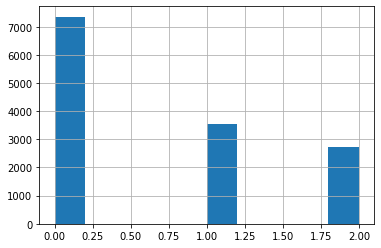

In [11]:
df['target'].hist()

<AxesSubplot:>

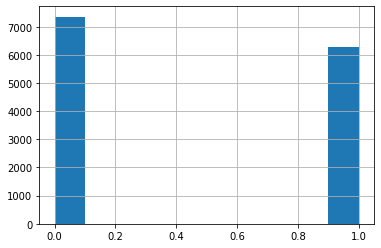

In [12]:
df['target_v2'].hist()

In [13]:
df['target'].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:>

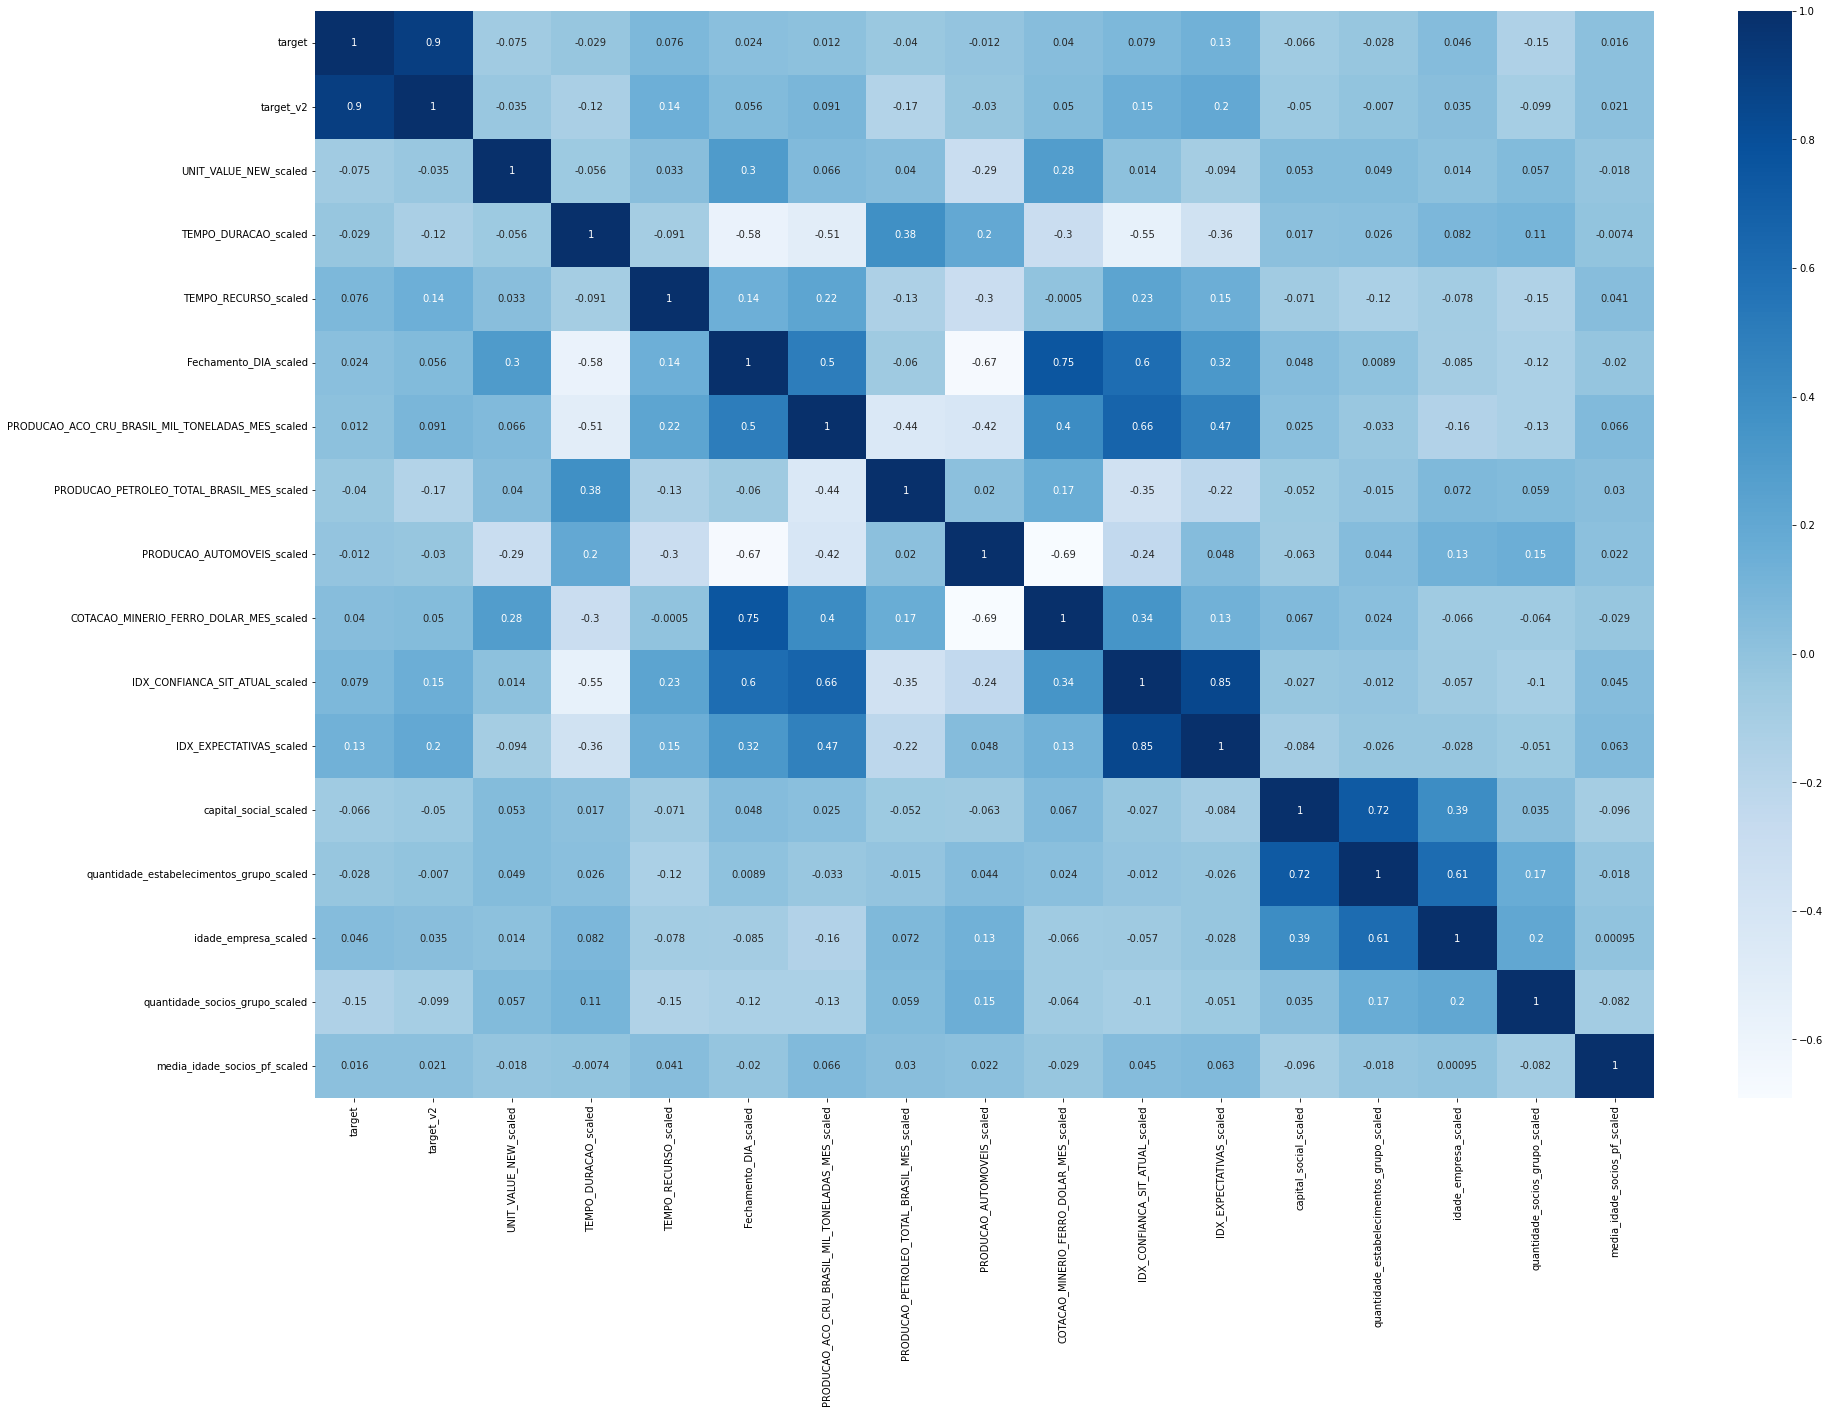

In [14]:
import matplotlib.pyplot as plt

# correlation plot
corr = df.corr()
fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches
sns.heatmap(corr, cmap = 'Blues', annot= True)

<AxesSubplot:>

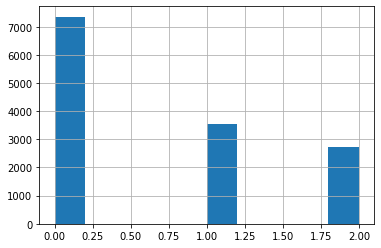

In [15]:
df.target.hist()

In [16]:
df['SUB_STATUS'] = df['SUB_STATUS'].astype('object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13649 entries, 0 to 13663
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SUB_STATUS                                        13649 non-null  object 
 1   UNIT_TEXT                                         13649 non-null  object 
 2   MEPP_y                                            13649 non-null  object 
 3   target                                            13649 non-null  int64  
 4   target_v2                                         13649 non-null  int64  
 5   natureza_jur                                      13649 non-null  object 
 6   quali_resp                                        13649 non-null  object 
 7   porte                                             13649 non-null  object 
 8   id_matriz_filial                                  13649 non-null  object 
 9   sit_cadastral    

In [18]:
one_hot_encoding_columns = df.describe(include='O').T.reset_index()['index'].to_list()
one_hot_encoding_columns


['SUB_STATUS',
 'UNIT_TEXT',
 'MEPP_y',
 'natureza_jur',
 'quali_resp',
 'porte',
 'id_matriz_filial',
 'sit_cadastral',
 'cnae_fiscal_principal',
 'uf',
 'opcao_simples']

In [19]:
prefix = dict(zip(one_hot_encoding_columns, one_hot_encoding_columns))
prefix
print(prefix)

{'SUB_STATUS': 'SUB_STATUS', 'UNIT_TEXT': 'UNIT_TEXT', 'MEPP_y': 'MEPP_y', 'natureza_jur': 'natureza_jur', 'quali_resp': 'quali_resp', 'porte': 'porte', 'id_matriz_filial': 'id_matriz_filial', 'sit_cadastral': 'sit_cadastral', 'cnae_fiscal_principal': 'cnae_fiscal_principal', 'uf': 'uf', 'opcao_simples': 'opcao_simples'}


In [20]:
# def neural_network_versao(in_versao, in_X_train, in_y_train, in_X_test, in_y_test):
#     print(f'############### {in_versao} ###############')
#     #Fit Logistic Regression model:
#     X_train = in_X_train
#     y_train = in_y_train
    
#     X_test = in_X_test
#     y_test = in_y_test

#     # Creating a sequential model
#     model = Sequential()

#     # Adding layers to the model
#     model.add(Dense(4, input_dim=73, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))

#     # Compiling the model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#     # Training the model
#     history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_test, y_test))

#     # Evaluating the model on test data
#     loss, accuracy = model.evaluate(X_test, y_test)
#     print('Test loss:', loss)
#     print('Test accuracy:', accuracy)

#     # Printing out model metric reports
#     from sklearn.metrics import classification_report
#     y_pred = model.predict(X_test)
#     y_pred_classes = (y_pred > 0.5).astype(int)
#     print(classification_report(y_test, y_pred_classes))

In [21]:
# Define the search space for the hyperparameters
search_space = {
    'num_hidden_layers': [1, 2, 3, 4],
    'num_neurons': [32, 64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 150],
}

# Define the fitness function that will evaluate each set of hyperparameters
def evaluate_fitness(hyperparameters, X_train, y_train, X_test, y_test):
    num_hidden_layers = hyperparameters['num_hidden_layers']
    num_neurons = hyperparameters['num_neurons']
    learning_rate = hyperparameters['learning_rate']
    batch_size = hyperparameters['batch_size']
    epochs = hyperparameters['epochs']
    
    # Build the neural network model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu'))
    for i in range(num_hidden_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # Train the model and evaluate its performance on the validation set
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(X_test, y_test), callbacks=[early_stopping])
    val_loss = np.min(history.history['val_loss'])
    
    # Return the negative validation loss as the fitness score
    return -val_loss

def run_genetic_algorithm(population_size, generations, X_train, y_train, X_test, y_test):
    # Initialize the population with random hyperparameters
    population = []
    for i in range(population_size):
        hyperparameters = {}
        for key, values in search_space.items():
            hyperparameters[key] = random.choice(values)
        population.append(hyperparameters)
    
    # Evolve the population for the specified number of generations
    for i in range(generations):
        # Evaluate the fitness of each individual in the population
        fitness_scores = []
        for individual in population:
            fitness_scores.append(evaluate_fitness(individual, X_train, y_train, X_test, y_test))
        
        # Select the parents for mating based on their fitness scores
        parents = []
        for j in range(2):
            parent_indices = np.random.choice(len(population), size=2, replace=False,
                                               p=np.exp(fitness_scores) / np.sum(np.exp(fitness_scores)))
            parents.append(population[parent_indices[0]])
            parents.append(population[parent_indices[1]])
        
        # Generate new offspring by crossover and mutation
        offspring = []
        for j in range(population_size - 2):
            child = {}
            for key in search_space.keys():
                if random.random() < 0.5:
                    child[key] = parents[0][key]
                else:
                    child[key] = parents[1][key]
                if random.random() < 0.1:
                    child[key] = random.choice(search_space[key])
            offspring.append(child)
        
        # Replace the old population with the new offspring
        population = parents + offspring
    
    # Evaluate the fitness of each individual in the final population
    fitness_scores = []
    for individual in population:
        fitness_scores.append(evaluate_fitness(individual, X_train, y_train, X_test, y_test))
    
    # Return the best individual found
    best_individual_index = np.argmax(fitness_scores)
    return population[best_individual_index]

In [22]:
# Dummy variable
df = pd.get_dummies(data = df, prefix = prefix, prefix_sep='_',
               columns = one_hot_encoding_columns,
               drop_first =True,
              dtype='int8')

In [23]:
ratio = 0.30

In [24]:
############### Com balanceamento com 3 classes###############

#Creating X and y:
X = df.drop(['target','target_v2'], axis=1)
y = df['target']
#Data split into train and test:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio)
# print('Distribuição das classes:', Counter(y))

In [25]:
# ############### Com balanceamento com 3 classes###############
# from sklearn.feature_selection import SelectKBest, f_classif
# #Creating X and y:
# X = df.drop(['target','target_v2'], axis=1)
# y = df['target']
# #Data split into train and test:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio)
# print('Distribuição das classes:', Counter(y))

# # Set the feature selection method
# # Here we assume that X_train is the training feature matrix
# # and y_train is the corresponding target vector
# feature_selector = SelectKBest(score_func=f_classif, k=10)
# X_train_new = feature_selector.fit_transform(X_train, y_train)
# X_test_new = feature_selector.fit_transform(X_test, y_test)

In [26]:
############### Com balanceamento com 3 classes###############

# Cria objeto SMOTE
smote = SMOTE(random_state=42)

# Realiza oversampling das classes minoritárias
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verifica distribuição das classes após oversampling
print('Distribuição das classes após oversampling:', Counter(y_resampled))

#Data split into train and test:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=ratio)

Distribuição das classes após oversampling: Counter({0: 7356, 2: 7356, 1: 7356})


In [27]:
# Example usage of evaluate_fitness and run_genetic_algorithm functions
population_size = 10
generations = 5

# Call the genetic algorithm to find optimal hyperparameters
best_individual = run_genetic_algorithm(population_size, generations,X_train_re, y_train_re, X_test_re, y_test_re)

# Evaluate the fitness of the best individual found
fitness_score = evaluate_fitness(best_individual, X_train_re, y_train_re, X_test_re, y_test_re)
print('Best individual:', best_individual)
print('Fitness score:', fitness_score)

Epoch 1/50
242/242 [==============================] - 1s 3ms/step - loss: -14124110.0000 - accuracy: 0.3384 - val_loss: -67053804.0000 - val_accuracy: 0.3441
Epoch 2/50
242/242 [==============================] - 1s 4ms/step - loss: -309500032.0000 - accuracy: 0.3377 - val_loss: -686568256.0000 - val_accuracy: 0.3444
Epoch 3/50
242/242 [==============================] - 1s 3ms/step - loss: -1483379968.0000 - accuracy: 0.3399 - val_loss: -2444399360.0000 - val_accuracy: 0.3439
Epoch 4/50
242/242 [==============================] - 1s 3ms/step - loss: -4092948480.0000 - accuracy: 0.3390 - val_loss: -5765270016.0000 - val_accuracy: 0.3459
Epoch 5/50
242/242 [==============================] - 1s 3ms/step - loss: -8434128896.0000 - accuracy: 0.3397 - val_loss: -10845877248.0000 - val_accuracy: 0.3421
Epoch 6/50
242/242 [==============================] - 1s 3ms/step - loss: -14757263360.0000 - accuracy: 0.3408 - val_loss: -17943773184.0000 - val_accuracy: 0.3453
Epoch 7/50
242/242 [===========

ValueError: probabilities contain NaN